In [1]:
import pandas as pd  # Import the pandas library and alias it as pd
import numpy as np  # Import the numpy library and alias it as np
import seaborn as sns  # Import the seaborn library and alias it as sns
import matplotlib.pyplot as plt  # Import the matplotlib library and alias it as plt
import matplotlib.colors as mcolors

In [2]:
df=pd.read_csv("Lead_data_clean.csv")
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Website Activity,0,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Activity,0,Email Activity
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Activity,1,Email Activity
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,Modified


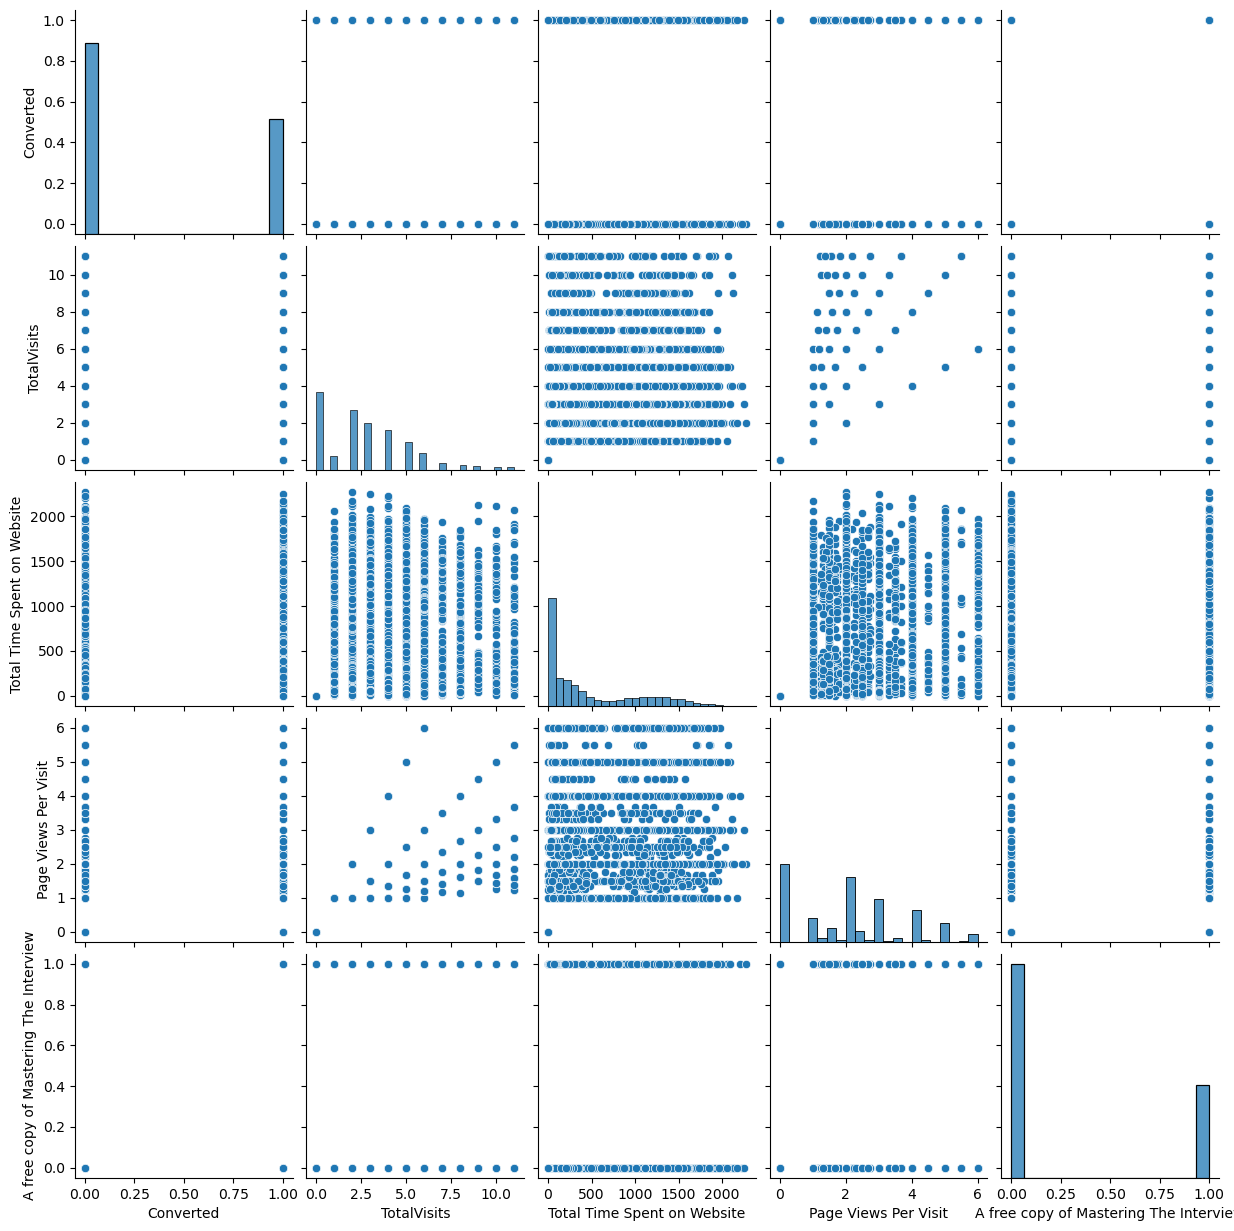

In [3]:
# Plot Pair Plot
sns.pairplot(df)
plt.show()

# categorizing the columns into cat_cols and num_cols

In [5]:
cat_cols=[]
num_cols=[]
for i in df.columns:
    if df[i].nunique()>10:
        num_cols.append(i)
        
    else:
        cat_cols.append(i)

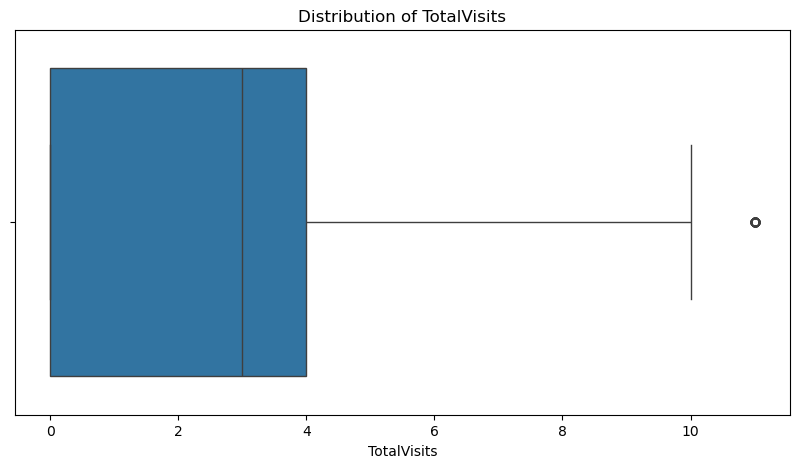

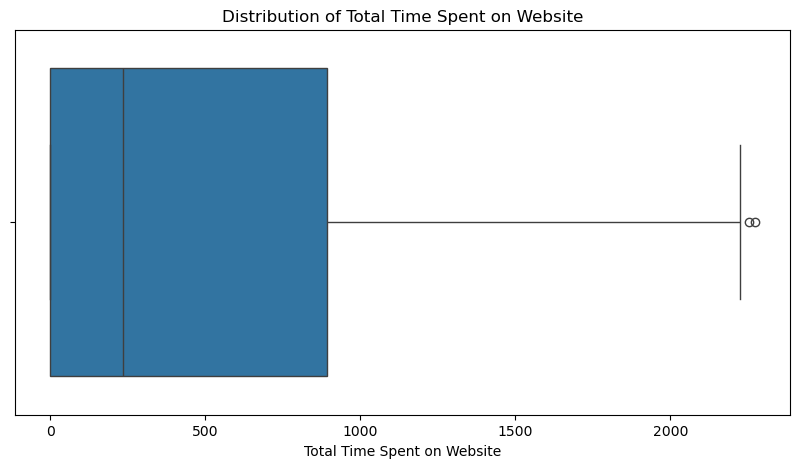

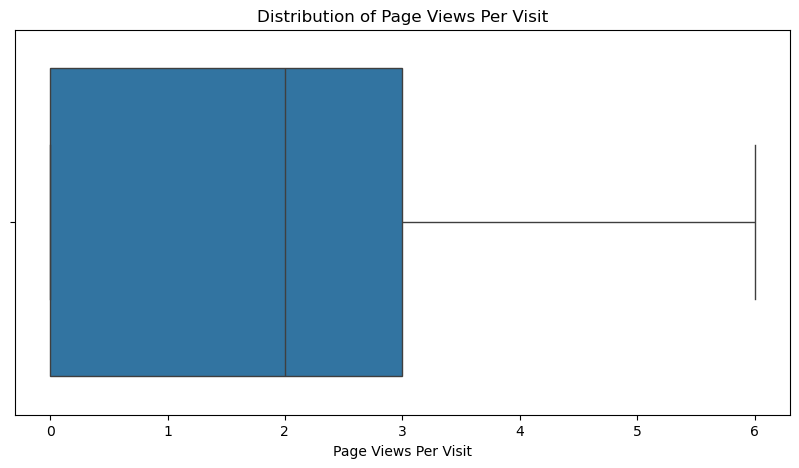

In [6]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()
    # plt.savefig(f'Distribution of {col}')

# Univariate analysis

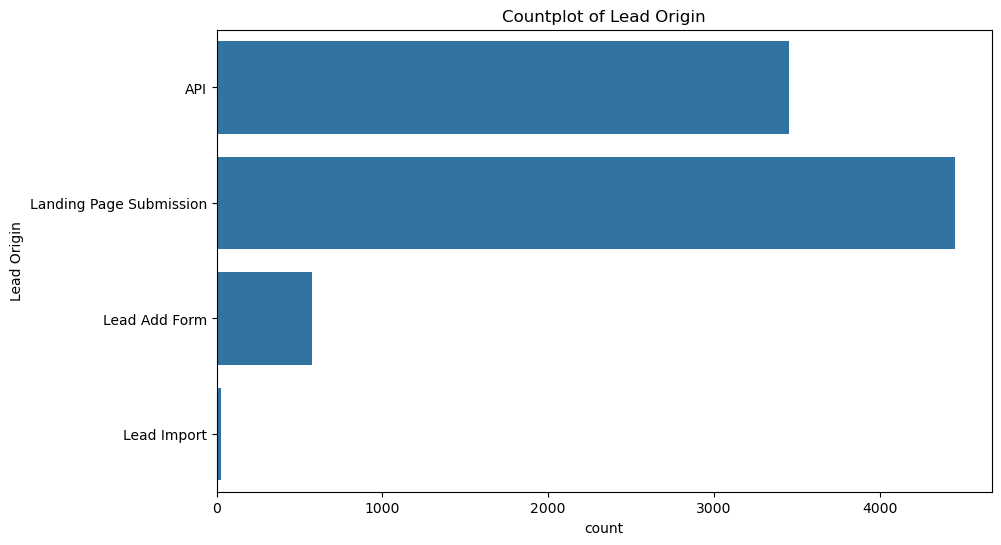

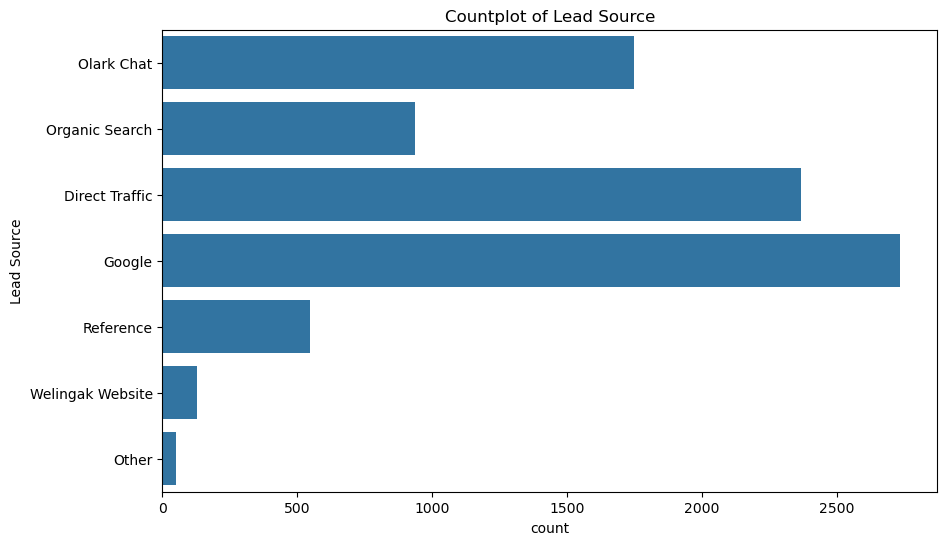

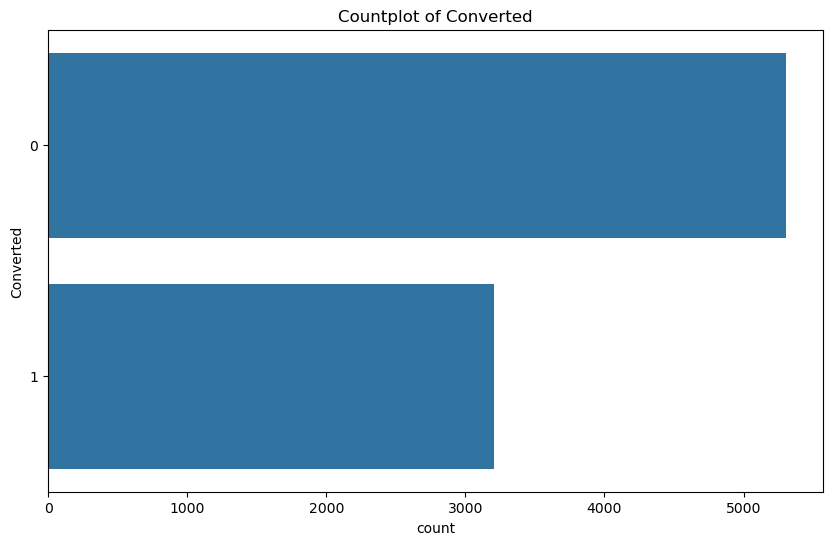

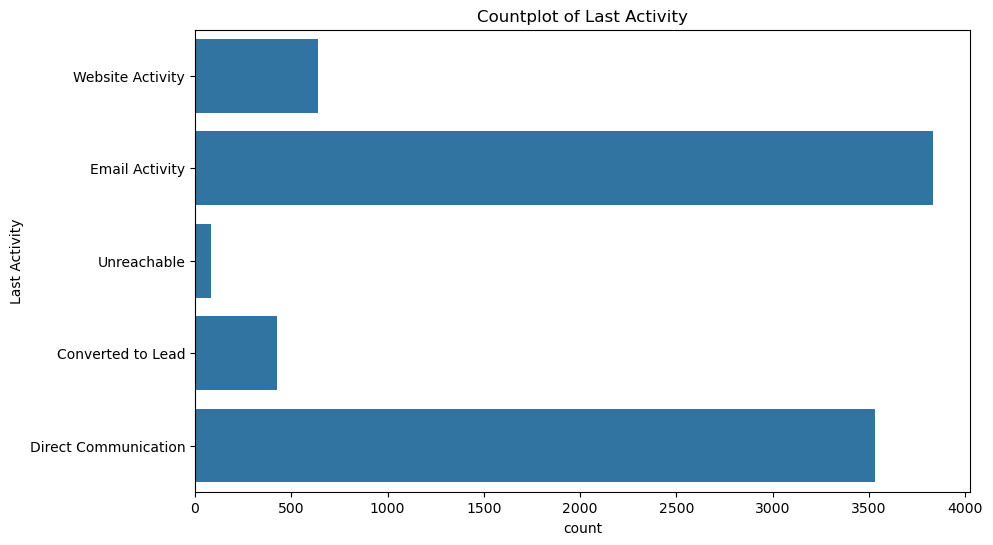

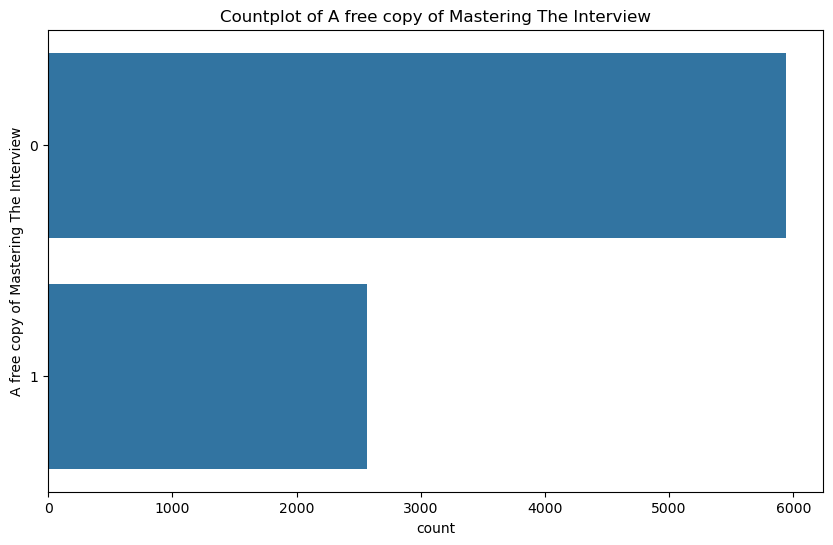

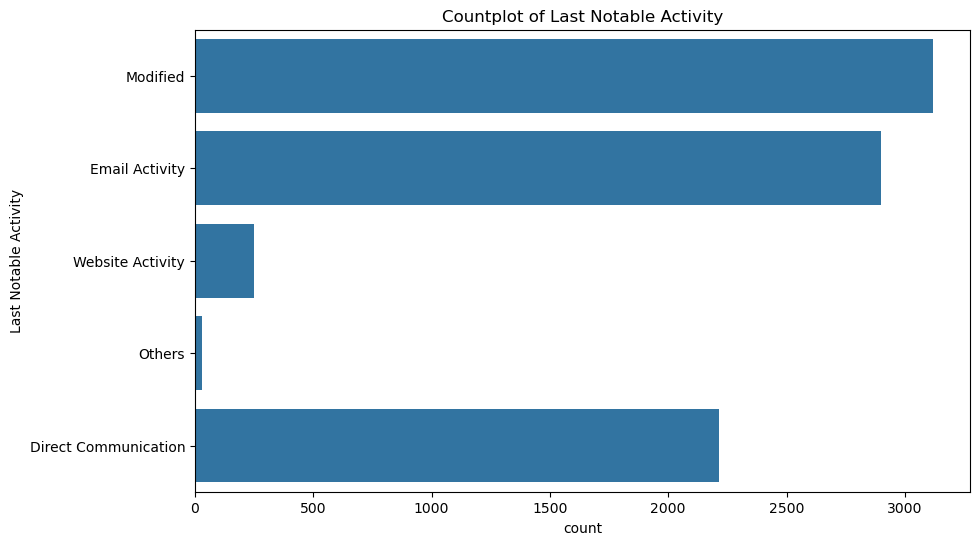

In [8]:
#Displaying countplot
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[col])
    plt.title(f'Countplot of {col}')
    plt.show()    

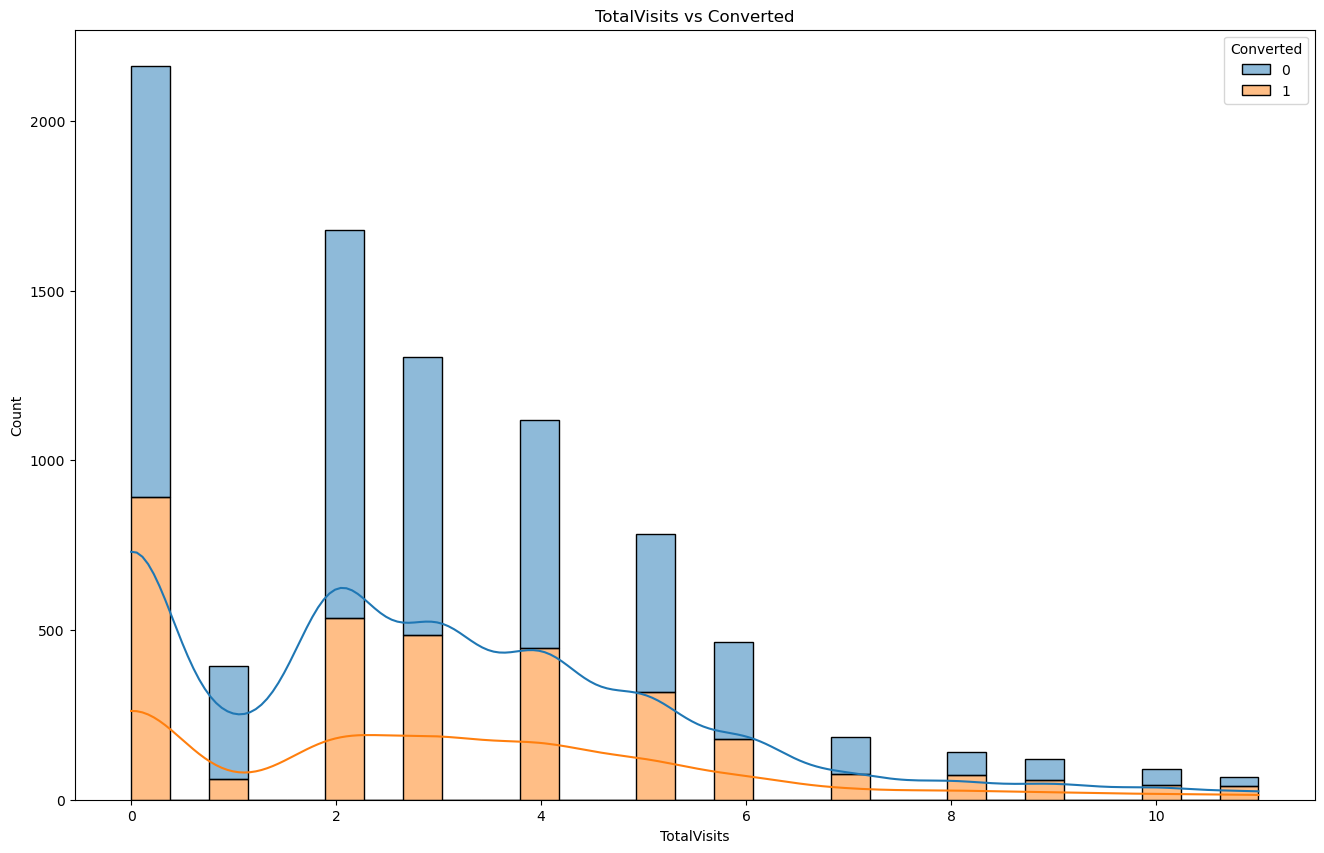

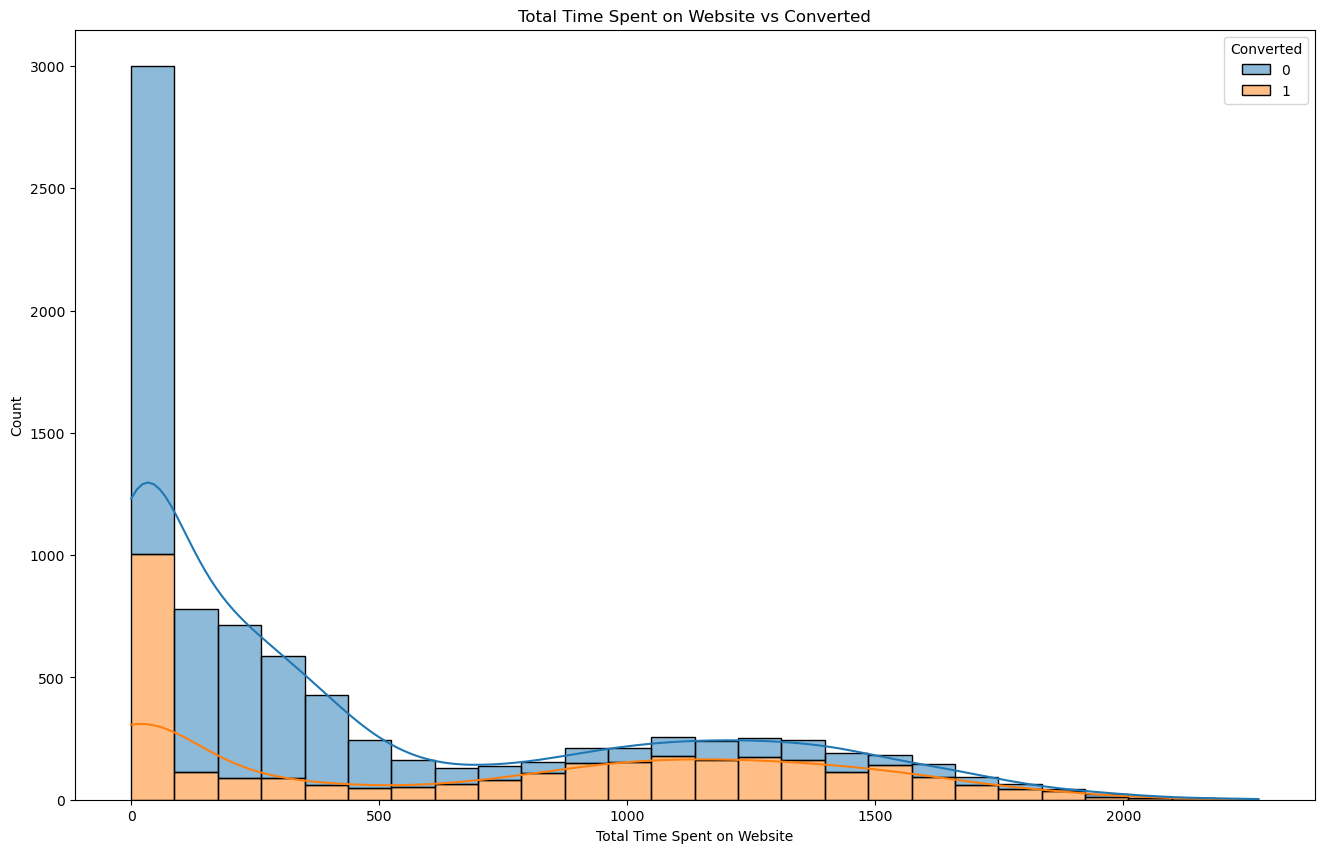

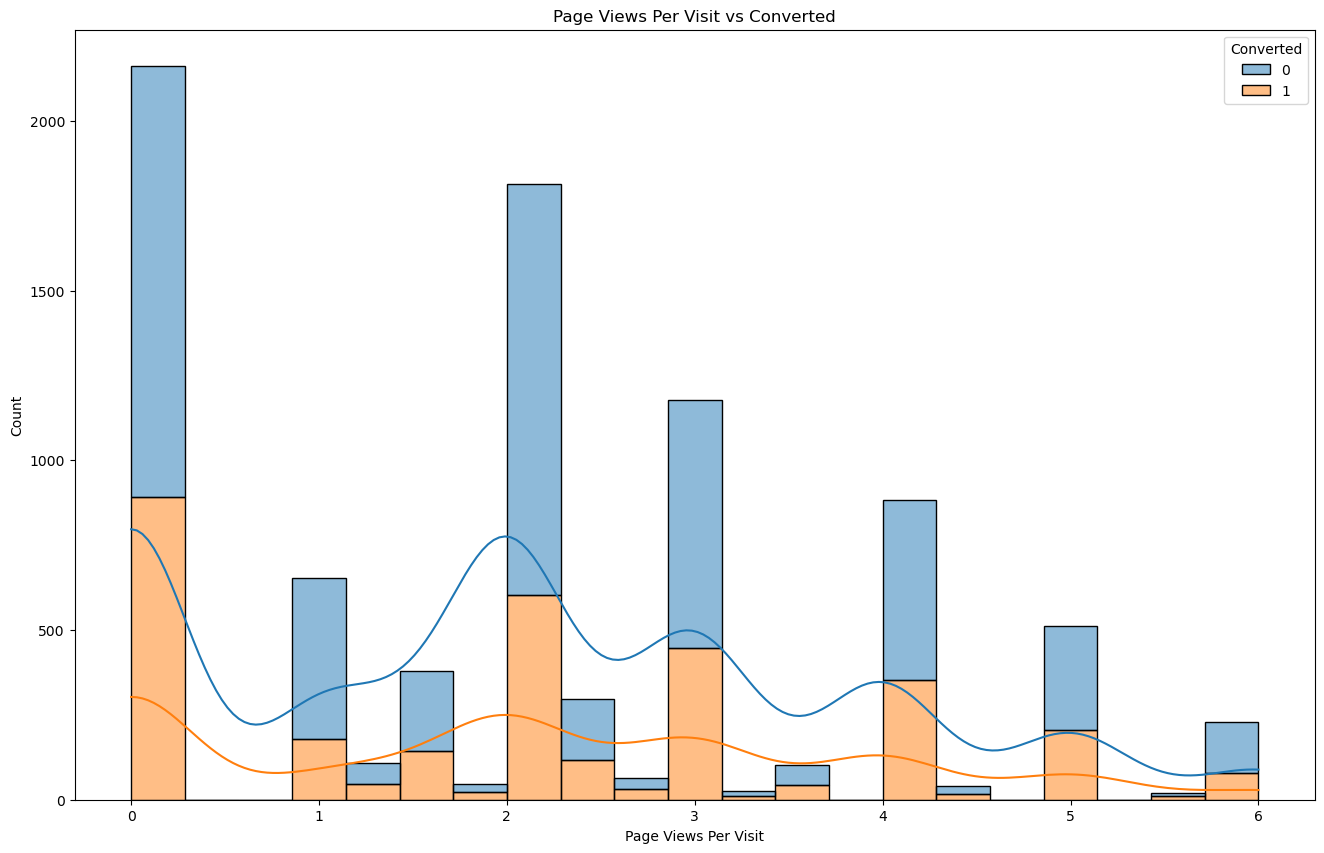

In [9]:
# Histogram
# Relationship between numerical features and target
for col in num_cols:
    plt.figure(figsize=(16, 10))
    sns.histplot(data=df, x=col, hue='Converted', multiple='stack', kde=True)
    plt.title(f'{col} vs Converted')
    plt.show()
    #plt.savefig(f'{col} vs TARGET')

# Bivariate analysis

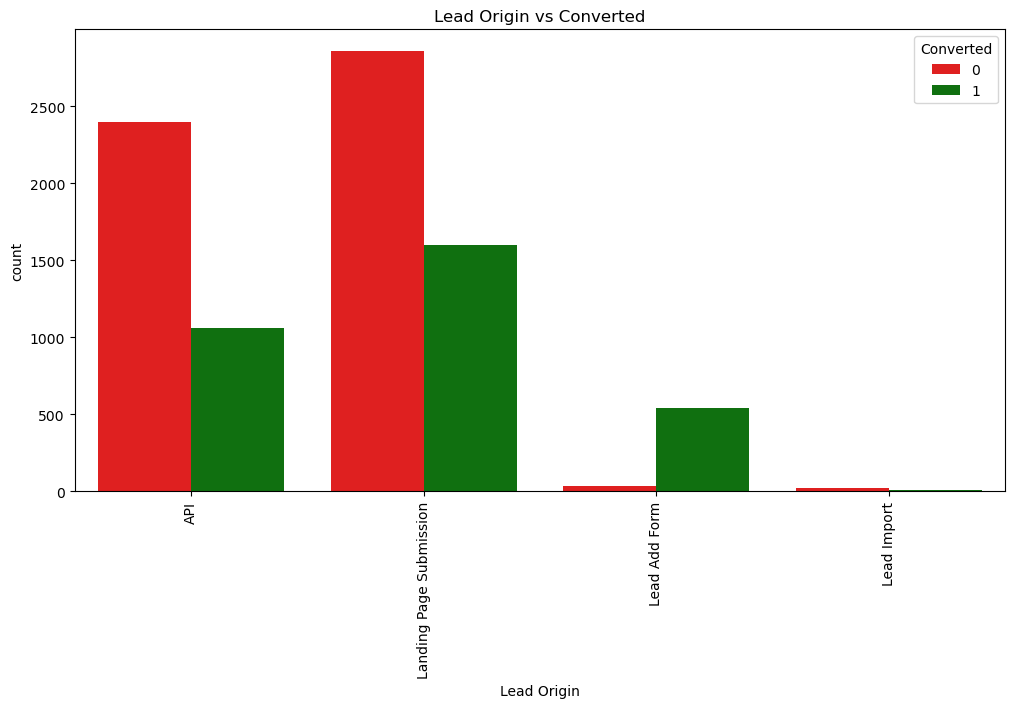

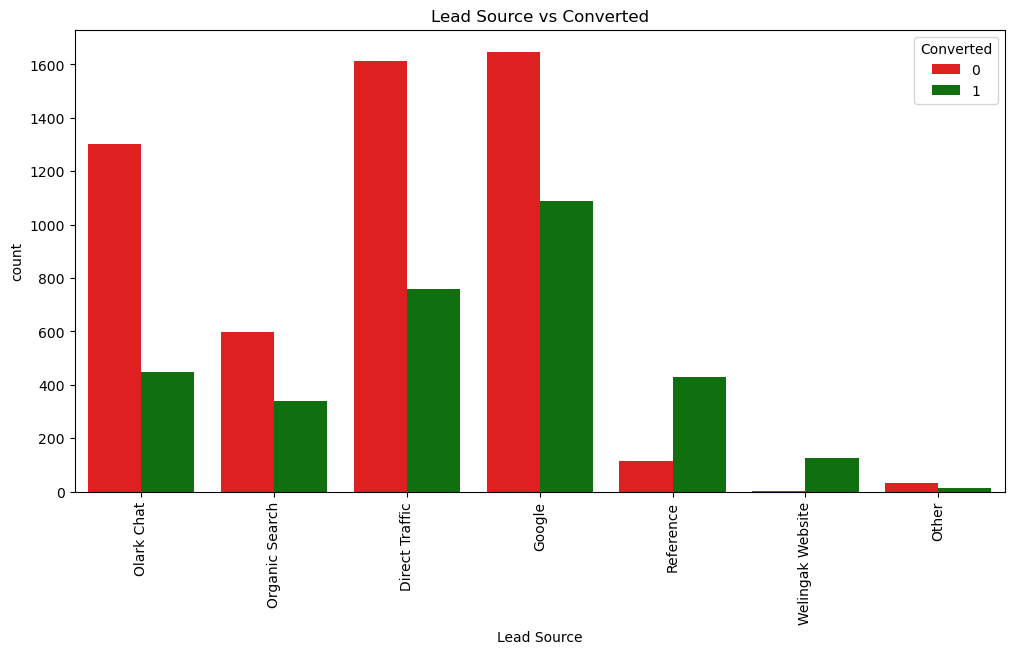

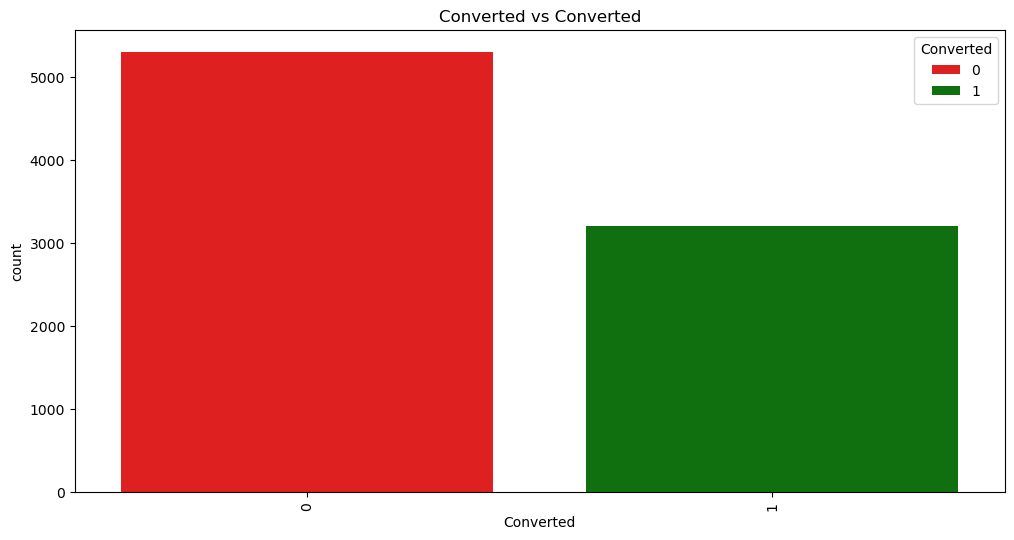

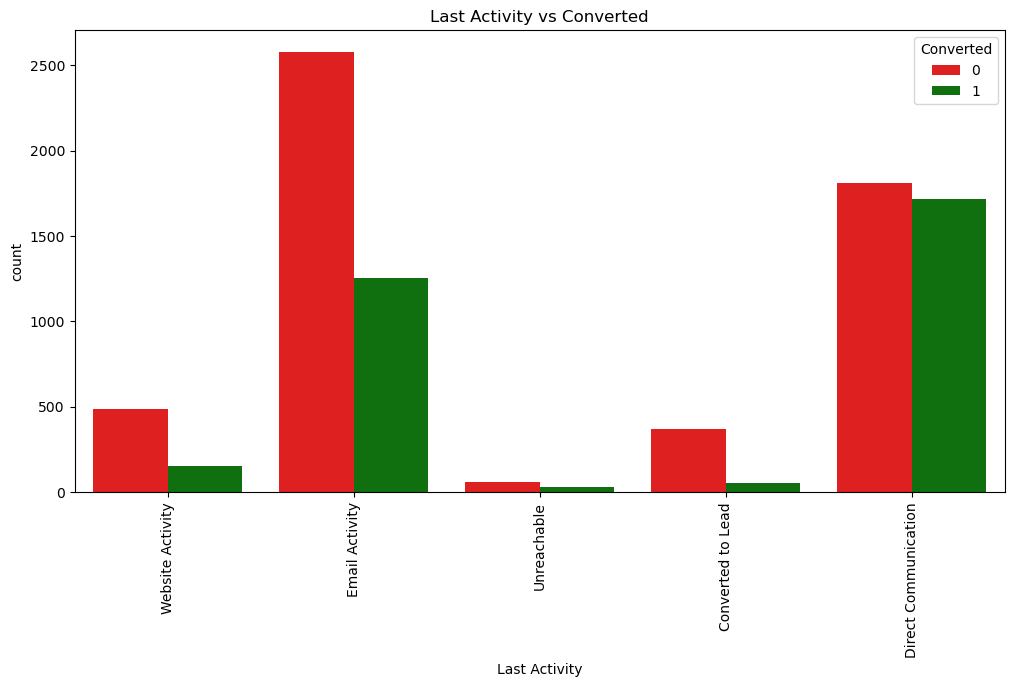

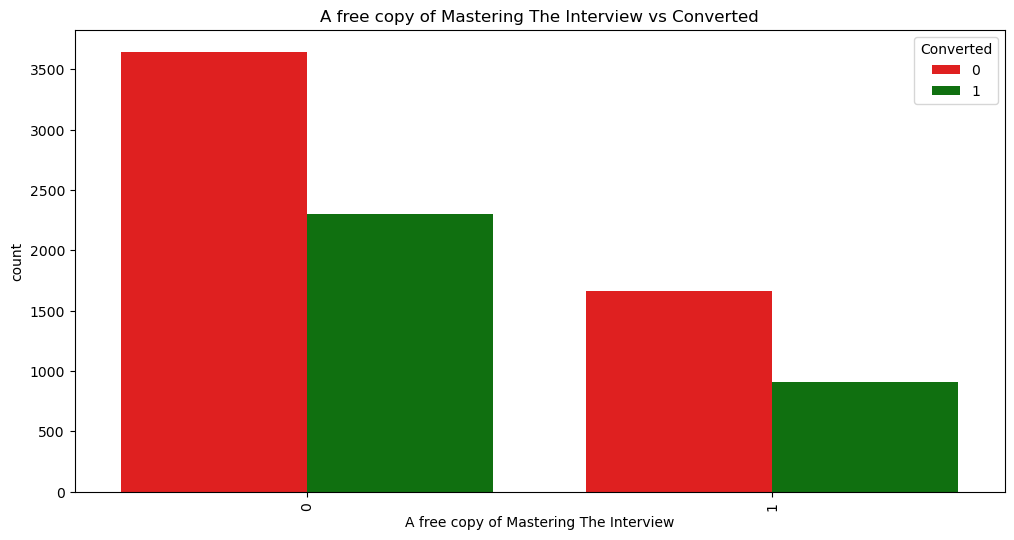

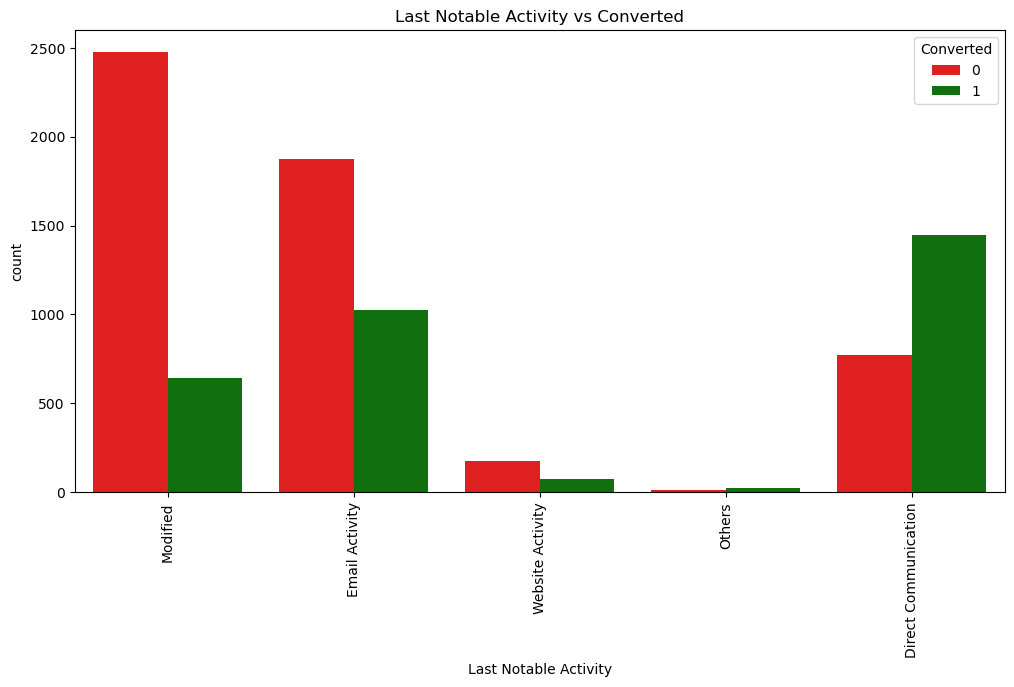

In [11]:
# Custom palette
custom_palette = {0: 'red', 1: 'green'}

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='Converted', data=df, palette=custom_palette)
    plt.title(f'{col} vs Converted')
    plt.xticks(rotation=90)
    plt.show()
    # plt.savefig(f'{col} vs Converted')

In [12]:
#create new data_frame as Converted and non-Converted
Converted = df[df.Converted == 1]
non_Converted=df[df.Converted == 0]

print(non_Converted.shape)
print(Converted.shape)

(5307, 9)
(3206, 9)


# Multivariate Analysis

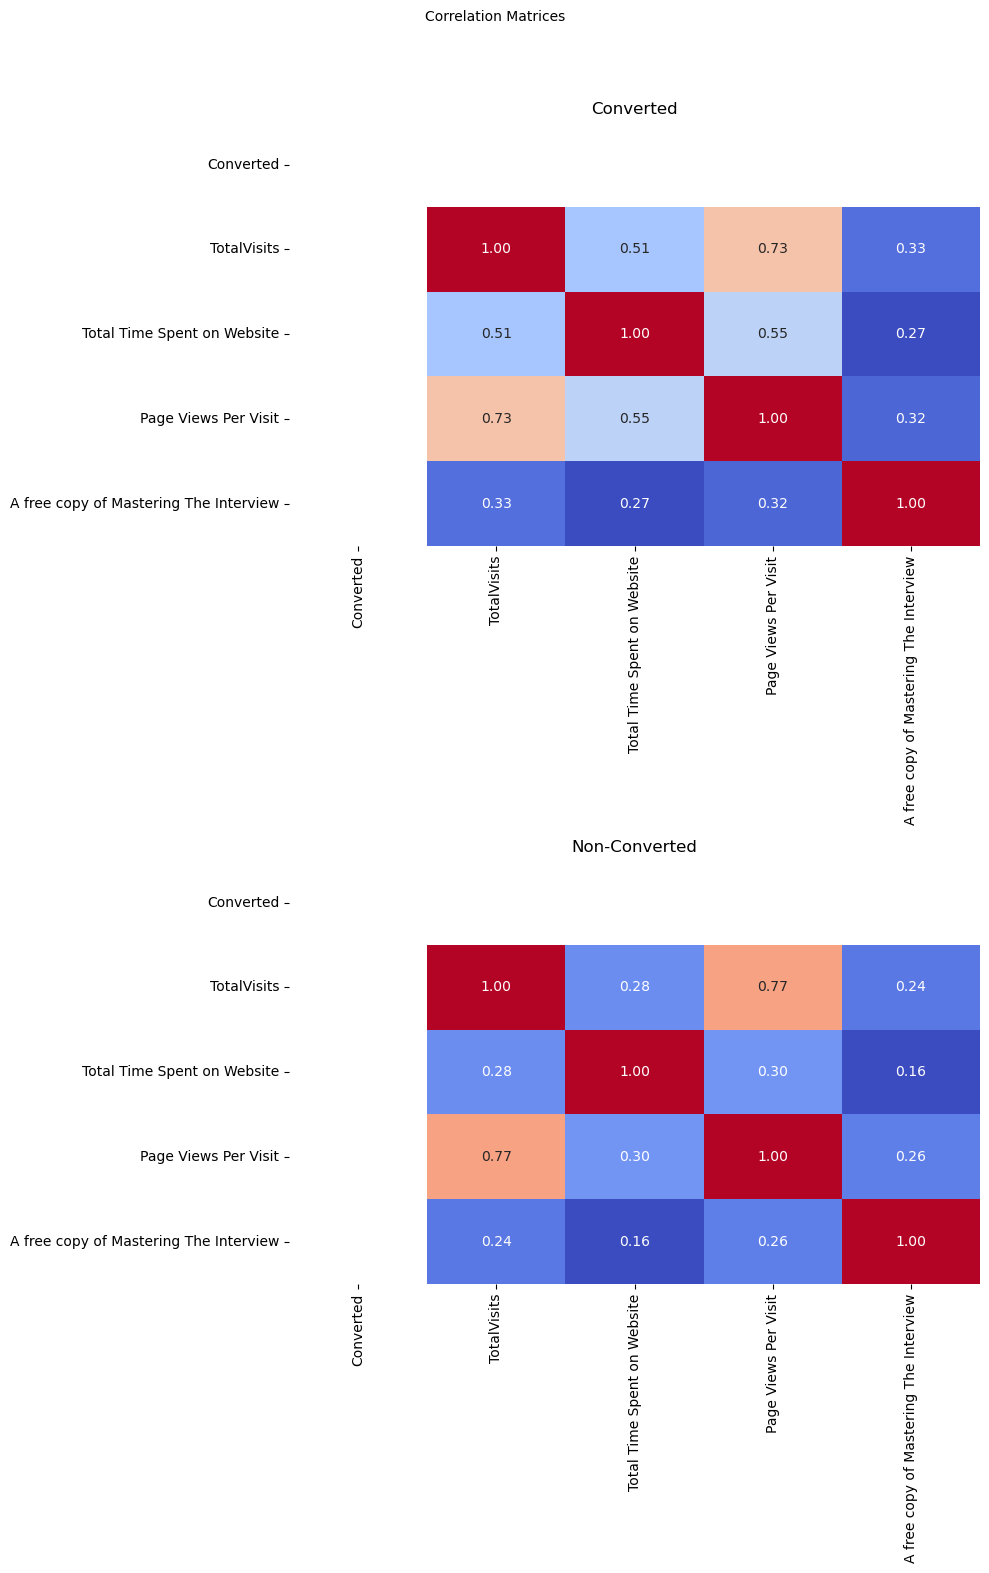

In [14]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Filter datasets to include only numeric columns
Converted_numeric = Converted[numeric_columns]
non_Converted_numeric = non_Converted[numeric_columns]

# Calculate correlation matrices
corr_Converted = Converted_numeric.corr()
corr_non_Converted = non_Converted_numeric.corr()

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 16))

# Set the main title
fig.suptitle('Correlation Matrices', fontsize=10)

# Heatmap for defaulters
sns.heatmap(corr_Converted, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, ax=axes[0])
axes[0].set_title('Converted')

# Heatmap for non-defaulters
sns.heatmap(corr_non_Converted, annot=True, fmt='.2f', cmap='coolwarm', cbar=False, ax=axes[1])
axes[1].set_title('Non-Converted')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()
